In [24]:

import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)


In [7]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20030 images belonging to 2 classes.


In [8]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory='data/validation/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20030 images belonging to 2 classes.
Found 2478 images belonging to 2 classes.


In [9]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_3.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_3 = model_3.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
313/313 [==============================] - 629s 2s/step - loss: 0.6865 - accuracy: 0.6304 - val_loss: 0.5962 - val_accuracy: 0.6864
Epoch 2/10
313/313 [==============================] - 600s 2s/step - loss: 0.5242 - accuracy: 0.7349 - val_loss: 0.5199 - val_accuracy: 0.7300
Epoch 3/10
313/313 [==============================] - 636s 2s/step - loss: 0.4458 - accuracy: 0.7899 - val_loss: 0.5036 - val_accuracy: 0.7575
Epoch 4/10
313/313 [==============================] - 534s 2s/step - loss: 0.3735 - accuracy: 0.8315 - val_loss: 0.5014 - val_accuracy: 0.7744
Epoch 5/10
313/313 [==============================] - 558s 2s/step - loss: 0.2981 - accuracy: 0.8714 - val_loss: 0.5242 - val_accuracy: 0.7639
Epoch 6/10
313/313 [==============================] - 561s 2s/step - loss: 0.2117 - accuracy: 0.9145 - val_loss: 0.6145 - val_accuracy: 0.7486
Epoch 7/10
313/313 [==============================] - 562s 2s/step - loss: 0.1363 - accuracy: 0.9492 - val_loss: 0.7414 - val_accuracy: 0.7587

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

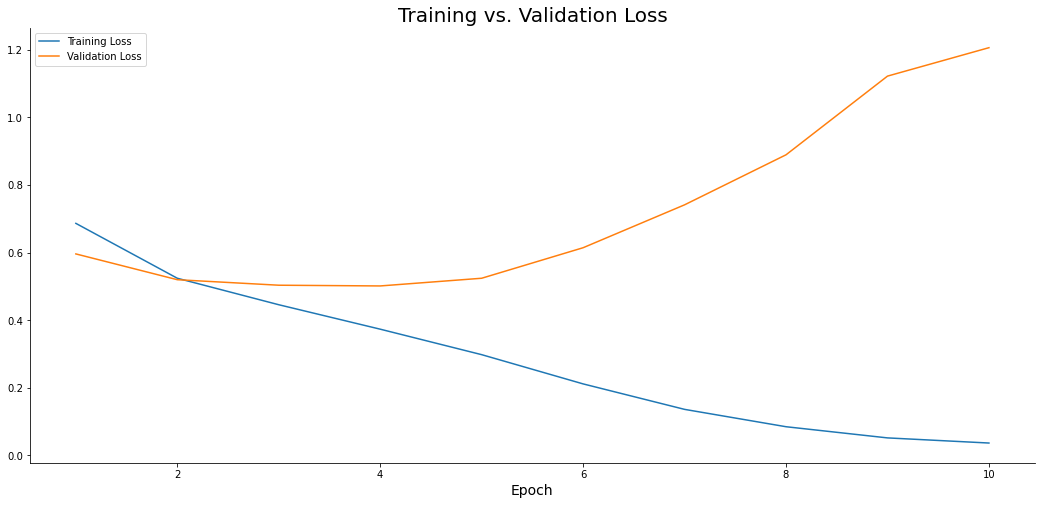

In [15]:
plt.plot(np.arange(1, 11), history_3.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history_3.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

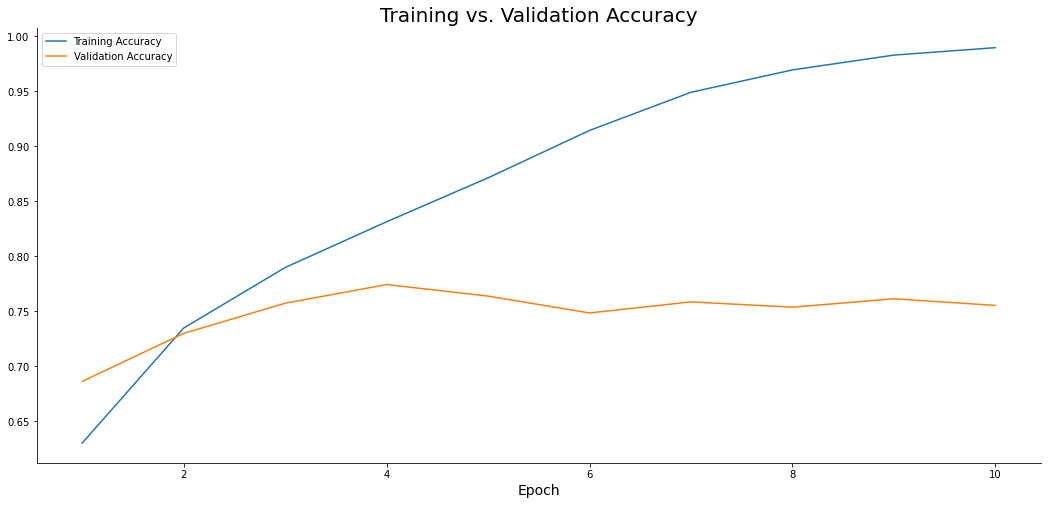

In [16]:
plt.plot(np.arange(1, 11), history_3.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 11), history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [18]:
def prepare_single_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = img.resize(size=(224, 224))
    return np.array(img) / 255.0

In [22]:
single_image = prepare_single_image(img_path='data/test/cat/10014.jpg')
single_prediction = model_3.predict(single_image.reshape(-1, 224, 224, 3))
single_prediction

array([[9.9973696e-01, 2.6297945e-04]], dtype=float32)

In [25]:
num_total_cat, num_correct_cat = 0, 0
num_total_dog, num_correct_dog = 0, 0

for img_path in pathlib.Path.cwd().joinpath('data/test/cat').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_3.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_cat += 1
        if pred == 0:
            num_correct_cat += 1
    except Exception as e:
        continue
        
for img_path in pathlib.Path.cwd().joinpath('data/test/dog').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_3.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_dog += 1
        if pred == 1:
            num_correct_dog += 1
    except Exception as e:
        continue

In [26]:
num_correct_dog

1245

In [27]:
num_total_cat

1239

In [28]:
num_correct_cat

932

In [29]:
num_correct_cat/num_total_cat

0.7522195318805488

In [30]:
num_correct_dog

966

In [32]:
num_correct_dog/num_total_dog

0.7759036144578313